In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os

from matplotlib import pyplot as plt

from metavision_core.event_io import RawReader

import lib

import rssr

In [2]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype'] = 'none'

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

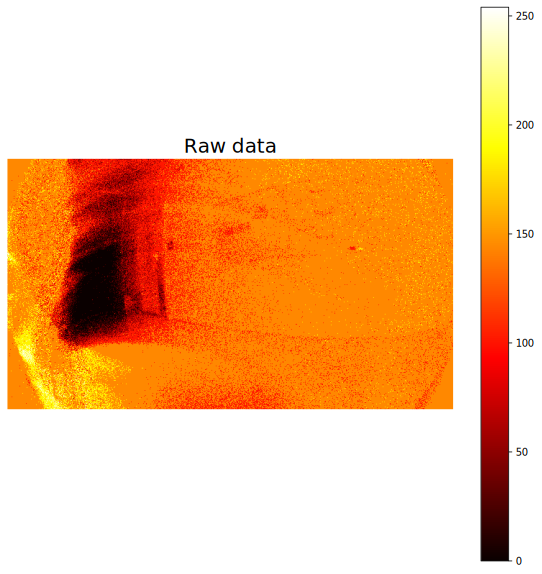

In [23]:
from metavision_sdk_base import EventCD
from metavision_sdk_core import BaseFrameGenerationAlgorithm
from metavision_ml.preprocessing.viz import viz_histo
from metavision_ml.preprocessing.event_to_tensor import histo

import numpy as np

calib_file = 'rssr_dataset/kalibrace_end/recording_2025-01-10_13-31-14.raw'

raw = RawReader(calib_file)

start_ts = 0.5 * 1e6
dt = 7.5 * 1e6

height, width = raw.get_size()
raw.seek_time(start_ts)

delta_t = dt  # sampling duration
events = raw.load_delta_t(delta_t)
events['t'] -= int(start_ts)

tbins = 4
volume = np.zeros((tbins, 2, height, width), dtype=np.float32)
histo(events, volume, delta_t)

im = viz_histo(volume[2])

plt.figure(figsize=(10, 10))
plt.imshow(im, cmap='hot', interpolation='nearest')
plt.title('Raw data', fontsize=20)
plt.axis('off')
plt.colorbar()
plt.show()